In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Classification Accuracy: 0.89


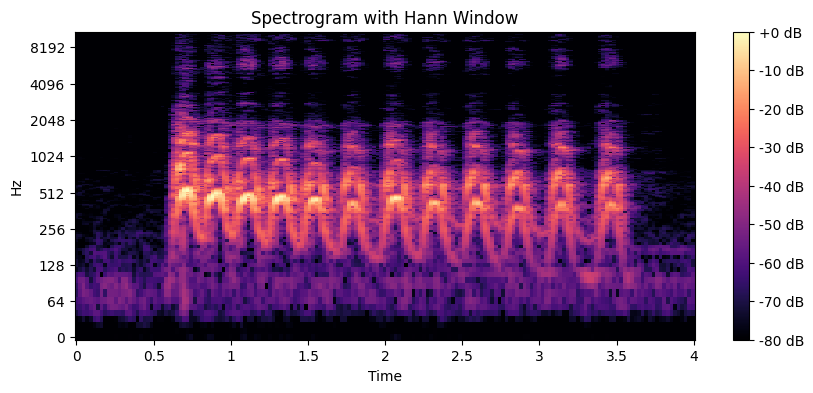

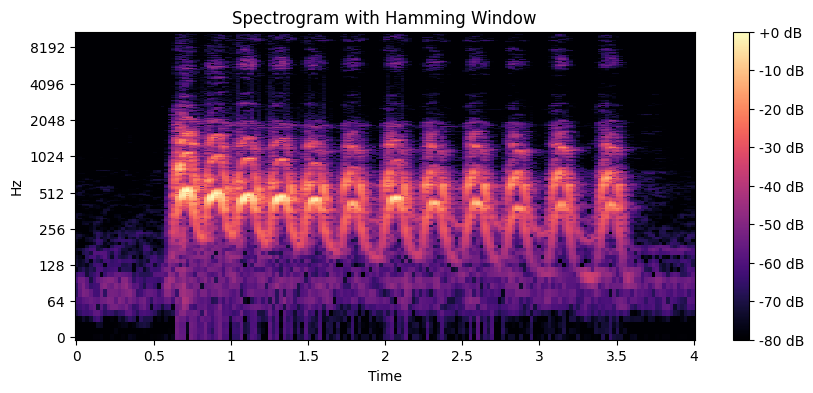

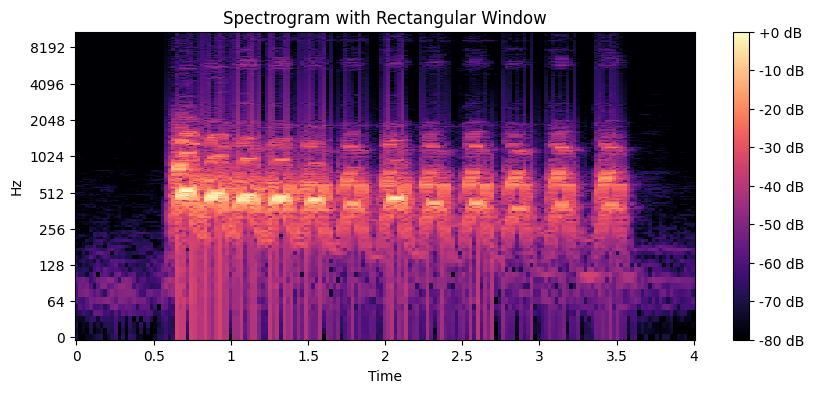

In [ ]:


# Set dataset path
DATASET_PATH = "/content/drive/MyDrive/UrbanSound8K"  # Replace with your dataset path

# Load an audio file
def load_audio(file_path, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)
    return y, sr

# Apply STFT with different windowing techniques
def apply_stft(y, sr, window_type):
    n_fft = 2048
    hop_length = 512
    if window_type == "hann":
        window = np.hanning(n_fft)
    elif window_type == "hamming":
        window = np.hamming(n_fft)
    else:  # Rectangular window
        window = np.ones(n_fft)
    stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window)
    return np.abs(stft_result), sr

# Plot and compare spectrograms
def plot_spectrogram(stft_result, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max),
                             sr=sr, hop_length=512, y_axis='log', x_axis='time')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Extract MFCC features
def extract_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)  # Fixed-length feature vector

# Process dataset and extract features
X, y_labels = [], []
for subdir, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(subdir, file)
            y, sr = load_audio(file_path)
            features = extract_features(y, sr)
            X.append(features)
            y_labels.append(int(file.split("-")[1]))  # Extract class label from filename

X = np.array(X)
y_labels = np.array(y_labels)

# Train an SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

# Test windowing techniques on one sample
file_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-3.wav"  # Replace with an actual file
y, sr = load_audio(file_path)
for window in ["hann", "hamming", "rectangular"]:
    stft_result, sr = apply_stft(y, sr, window)
    plot_spectrogram(stft_result, sr, f"Spectrogram with {window.capitalize()} Window")
